In [ ]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [ ]:
# Preparing data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Change the form to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Standart images from [0, 255] to [0,1]
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [ ]:
batch_size = 16

In [ ]:
x_train.shape

torch.Size([60000, 28, 28])

In [ ]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

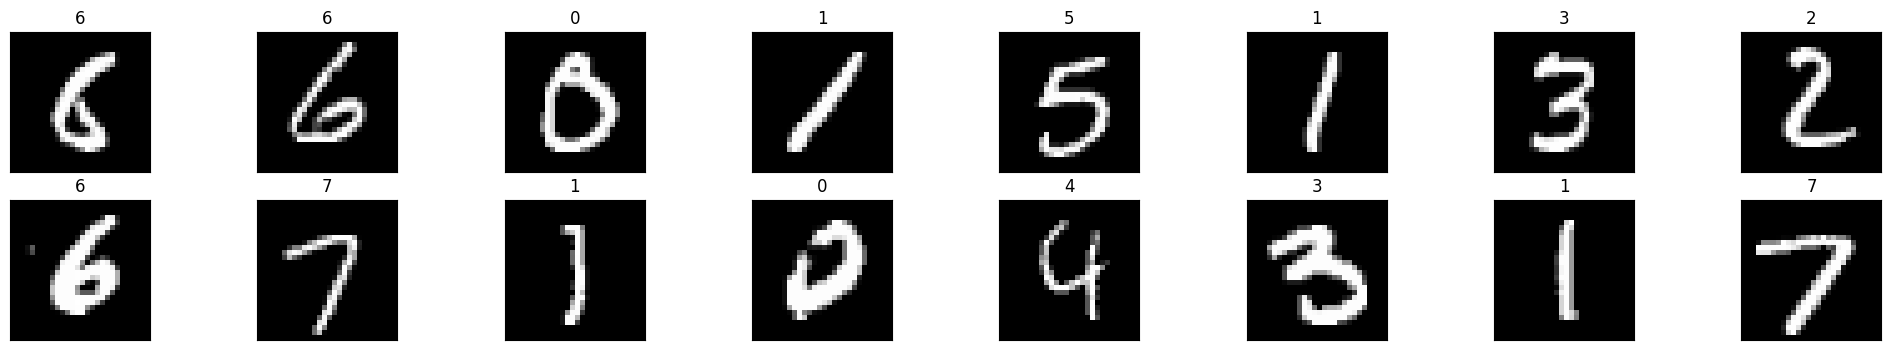

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size / 2), idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, num_classes)
    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
def accuracy():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [ ]:
losses = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.960
Iteration: 20, accuracy: 0.966
Iteration: 30, accuracy: 0.967
Iteration: 40, accuracy: 0.969
Iteration: 50, accuracy: 0.973
Iteration: 60, accuracy: 0.973
Iteration: 70, accuracy: 0.973
Iteration: 80, accuracy: 0.975
Iteration: 90, accuracy: 0.976
Iteration: 100, accuracy: 0.977
Finished Training


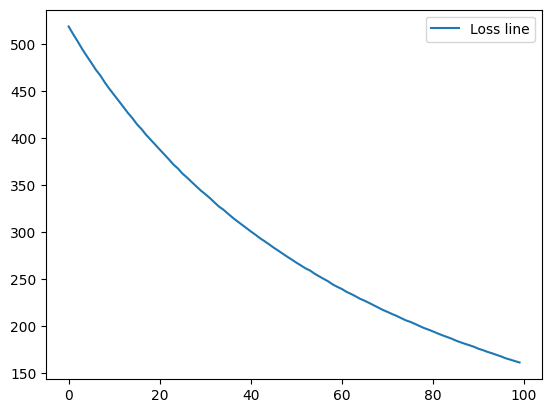

In [ ]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

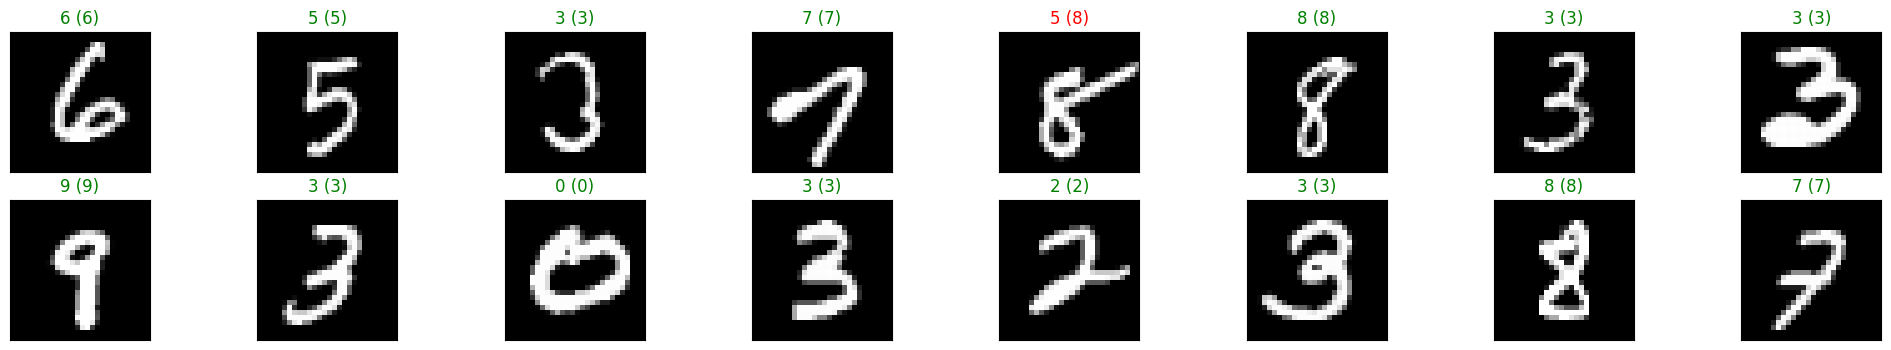

In [ ]:
# obtain one batch of test images
dataiter = iter(testloader)
(images, labels) = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

3 layers NN model

In [ ]:
# Split the data into valid data and train data
from sklearn.model_selection import train_test_split
new_x_train, x_dev, new_y_train, y_dev = train_test_split(x_train, y_train, train_size = 0.85, random_state = 42)

In [ ]:
# Create train and dev loader
tr_loader = []
for (i,j) in zip(x_train, y_train):
    tr_loader.append([i,j])
tr_loader = torch.utils.data.DataLoader(tr_loader, shuffle=True, batch_size=batch_size)

te_loader = []
for (i,j) in zip(x_test, y_test):
    te_loader.append([i,j])
te_loader = torch.utils.data.DataLoader(te_loader, shuffle=True, batch_size=batch_size)


In [ ]:
n_hidden_3 = 256

In [ ]:
class layers_3_Model(nn.Module):
    def __init__(self):
        super(layers_3_Model, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.fc4 = nn.Linear(n_hidden_3, num_classes)
    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# initialize the NN
model_3 = layers_3_Model()
print(model_3)

layers_3_Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
optimizer_3 = optim.SGD(model.parameters(), lr=0.05)

In [ ]:
losses_3 = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(tr_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses_3.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.956
Iteration: 20, accuracy: 0.960
Iteration: 30, accuracy: 0.964
Iteration: 40, accuracy: 0.967
Iteration: 50, accuracy: 0.970
Iteration: 60, accuracy: 0.971
Iteration: 70, accuracy: 0.972
Iteration: 80, accuracy: 0.974
Iteration: 90, accuracy: 0.974
Iteration: 100, accuracy: 0.975
Finished Training


In [ ]:
# Valid the model
accuracy_3 = accuracy()
print(f'Accuracy of the model on the test data: {accuracy_3:.2f}%')

Accuracy of the model on the test data: 0.97%


5 hidden layer model

In [ ]:
n_hidden_4 = 256
n_hidden_5 = 256

In [ ]:
class layers_5_Model(nn.Module):
    def __init__(self):
        super(layers_5_Model, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.fc4 = nn.Linear(n_hidden_3, n_hidden_4)
        self.fc5 = nn.Linear(n_hidden_4, n_hidden_5)
        self.fc6 = nn.Linear(n_hidden_5, num_classes)
    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# initialize the NN
model_5 = layers_5_Model()
print(model_5)

layers_5_Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
losses_5 = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(tr_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses_5.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.5f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.97530
Iteration: 20, accuracy: 0.97620
Iteration: 30, accuracy: 0.97720
Iteration: 40, accuracy: 0.97700
Iteration: 50, accuracy: 0.97750
Iteration: 60, accuracy: 0.97780
Iteration: 70, accuracy: 0.97850
Iteration: 80, accuracy: 0.97810
Iteration: 90, accuracy: 0.97850
Iteration: 100, accuracy: 0.97830
Finished Training


In [ ]:
# Valid the model
accuracy_5 = accuracy()
print(f'Accuracy of the model on the test data: {accuracy_5:.2f}%')

Accuracy of the model on the test data: 0.98%


From that, We could conclude that the dev set helf us monitor the model, prevent overfitting